In [ ]:
### 1 ###
class Neuron:
    def __init__(self):
        self.w1 = 0.5
        self.w2 = 0.1

    def learn(self, o, s, c):
        error = self.decide(o, s) - c
        self.w1 -= 0.01 * error * o
        self.w2 -= 0.01 * error * s

    def decide(self, o, s):
        c = 0
        if (o*self.w1 + s*self.w2) > 1:
            c = 1
        return c

if __name__ == "__main__":
    neuron = Neuron()

    # training
    neuron.learn(1, 1, 1)
    neuron.learn(1, 0, 0)
    neuron.learn(0, 1, 0)
    neuron.learn(0, 0, 0)

    # testing
    print(neuron.decide(1, 1))
    print(neuron.decide(1, 0))
    print(neuron.decide(0, 1))
    print(neuron.decide(0, 0))


0
0
0
0


In [ ]:
### 2 ###
class Neuron:
    def __init__(self):
        self.w1 = 0.5
        self.w2 = 0.1
        self.t = 2.3

    def learn(self, o, s, c):
        error = self.decide(o, s) - c
        self.w1 -= 0.01 * error * o
        self.w2 -= 0.01 * error * s
        self.t += 0.01 * error

    def decide(self, o, s):
        c = 0
        if (o*self.w1 + s*self.w2) > self.t:
            c = 1
        return c

if __name__ == "__main__":
    neuron = Neuron()

    # training
    for i in range(300):
        neuron.learn(1, 1, 1)
        neuron.learn(1, 0, 1)
        neuron.learn(0, 1, 1)
        neuron.learn(0, 0, 1)

    # testing
    print(neuron.decide(1, 1))
    print(neuron.decide(1, 0))
    print(neuron.decide(0, 1))
    print(neuron.decide(0, 0))


1
1
1
1


In [ ]:
### 3 ###
class Neuron:
    def __init__(self):
        self.w1 = 0.5
        self.w2 = 0.1
        self.t = 2.3

    def learn(self, o, s, c):
        error = self.decide(o, s) - c
        self.w1 -= 0.01 * error * o
        self.w2 -= 0.01 * error * s
        self.t += 0.01 * error

    def decide(self, o, s):
        c = 0
        if (o*self.w1 + s*self.w2) > self.t:
            c = 1
        return c

data = [[1, 1, 1],
        [1, 0, 1],
        [0, 1, 1],
        [0, 0, 1]]

def runTraining(neuron):
    for row in data:
        neuron.learn(row[0], row[1], row[2])

def runTesting(neuron):
    return [neuron.decide(row[0], row[1]) for row in data]

def runEvaluation(neuron):
    results = runTesting(neuron)
    performance = 0
    for row, result in zip(data, results):
        if row[2] == result:
          performance += 1
    return performance

if __name__ == "__main__":
    neuron = Neuron()

    for i in range(30):
        for j in range(10):
            runTraining(neuron)
        print (f'epoch {(i+1)*10} : {runEvaluation(neuron)}')

    print(runTesting(neuron))

epoch 10 : 0
epoch 20 : 0
epoch 30 : 1
epoch 40 : 2
epoch 50 : 3
epoch 60 : 3
epoch 70 : 3
epoch 80 : 3
epoch 90 : 3
epoch 100 : 3
epoch 110 : 3
epoch 120 : 3
epoch 130 : 4
epoch 140 : 4
epoch 150 : 4
epoch 160 : 4
epoch 170 : 4
epoch 180 : 4
epoch 190 : 4
epoch 200 : 4
epoch 210 : 4
epoch 220 : 4
epoch 230 : 4
epoch 240 : 4
epoch 250 : 4
epoch 260 : 4
epoch 270 : 4
epoch 280 : 4
epoch 290 : 4
epoch 300 : 4
[1, 1, 1, 1]


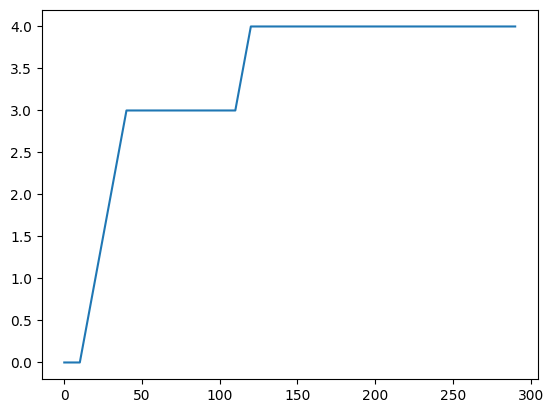

In [ ]:
### 4 ###
class Neuron:
    def __init__(self):
        self.w1 = 0.5
        self.w2 = 0.1
        self.t = 2.3

    def learn(self, o, s, c):
        error = self.decide(o, s) - c
        self.w1 -= 0.01 * error * o
        self.w2 -= 0.01 * error * s
        self.t += 0.01 * error

    def decide(self, o, s):
        c = 0
        if (o*self.w1 + s*self.w2) > self.t:
            c = 1
        return c

data = [[1, 1, 1],
        [1, 0, 1],
        [0, 1, 1],
        [0, 0, 1]]

def runTraining(neuron):
    for row in data:
        neuron.learn(row[0], row[1], row[2])

def runTesting(neuron):
    return [neuron.decide(row[0], row[1]) for row in data]

def runEvaluation(neuron):
    results = runTesting(neuron)
    performance = 0
    for row, result in zip(data, results):
        if row[2] == result:
          performance += 1
    return performance

import matplotlib.pyplot as plt

if __name__ == "__main__":
    neuron = Neuron()

    performanceImprovement = []
    for i in range(30):
        for j in range(10):
            runTraining(neuron)
        performanceImprovement.append(runEvaluation(neuron))

    plt.plot([i*10 for i in range(30)], performanceImprovement)
    plt.show()

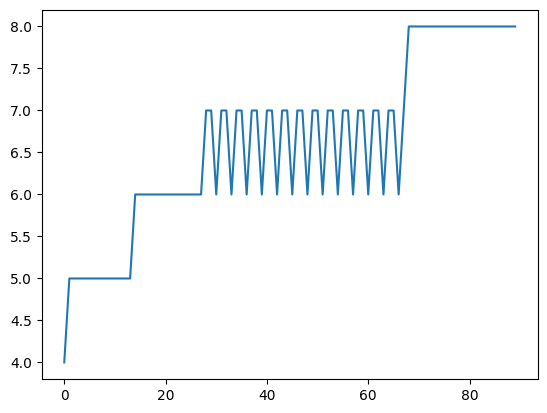

In [ ]:
### 5 ###
import random
import matplotlib.pyplot as plt

class Neuron:
    def __init__(self, input_count):
        self.weights = [random.random() for _ in range(input_count)]
        self.threshold = random.random()

    def decide(self, input_list):
        sum = 0
        for w, i in zip(self.weights, input_list):
            sum += i*w

        if sum > self.threshold:
            return 1
        return 0

    def learn(self, input_list, output):
        error = self.decide(input_list) - output
        for i in range(len(self.weights)):
            self.weights[i] -= 0.01 * error * input_list[i]
        self.threshold += 0.01 * error

def runTraining(neuron, input_lists, outputs):
    for input_list, output in zip(input_lists, outputs):
        neuron.learn(input_list, output)

def runTesting(neuron, input_lists):
    return [neuron.decide(input_list) for input_list in input_lists]

def runEvaluation(neuron, input_lists, outputs):
    predictions = runTesting(neuron, input_lists)
    performance = 0
    for ground_truth, prediction in zip(outputs, predictions):
        if ground_truth == prediction:
            performance += 1
    return performance

if __name__ == "__main__":
    data = [[1, 1, 1, 1],
            [1, 0, 1, 0],
            [0, 1, 1, 0],
            [0, 0, 1, 0],
            [1, 1, 0, 1],
            [1, 0, 0, 1],
            [0, 1, 0, 1],
            [0, 0, 0, 1]]

    input_lists = [row[:-1] for row in data]
    outputs = [row[-1] for row in data]

    neuron = Neuron(len(input_lists[0]))

    epoch = 90
    performanceImprovement = []
    for i in range(epoch):
        runTraining(neuron, input_lists, outputs)
        performanceImprovement.append(runEvaluation(neuron, input_lists, outputs))

    plt.plot([i for i in range(epoch)], performanceImprovement)
    plt.show()

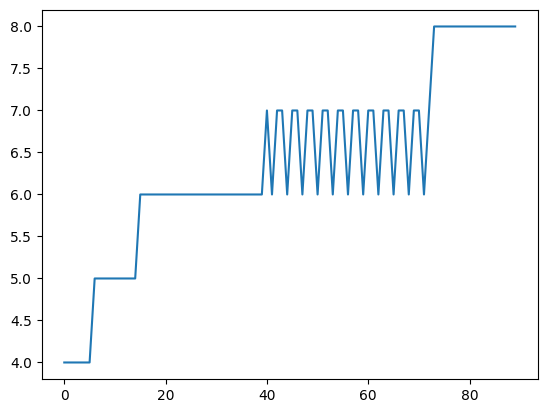

In [ ]:
### 6 ###
import random
import matplotlib.pyplot as plt

class Neuron:
    def __init__(self, input_count):
        self.weights = [random.random() for _ in range(input_count)]
        self.bias = random.random()
        self.learning_rate = 0.01

    def _calculate_output(self, input_list):
        sum = 0
        for w, i in zip(self.weights, input_list):
            sum += i*w
        return sum + self.bias

    def _activation(self, output):
        return 1 if output > 0 else 0

    def decide(self, input_list):
        output = self._calculate_output(input_list)
        return self._activation(output)

    def learn(self, input_list, error):
        for i in range(len(self.weights)):
            self.weights[i] -= self.learning_rate * error * input_list[i]
        self.bias -= self.learning_rate * error


input_lists = [[1, 1, 1],
               [1, 0, 1],
               [0, 1, 1],
               [0, 0, 1],
               [1, 1, 0],
               [1, 0, 0],
               [0, 1, 0],
               [0, 0, 0]]
outputs = [1,
           0,
           0,
           0,
           1,
           1,
           1,
           1]

def runTraining(neuron):
    for input_list, output in zip(input_lists, outputs):
        error = neuron.decide(input_list) - output
        neuron.learn(input_list, error)

def runTesting(neuron):
    return [neuron.decide(input_list) for input_list in input_lists]

def runEvaluation(neuron):
    predictions = runTesting(neuron)
    performance = 0
    for ground_truth, prediction in zip(outputs, predictions):
        if ground_truth == prediction:
            performance += 1
    return performance

if __name__ == "__main__":
    neuron = Neuron(len(input_lists[0]))

    epoch = 90
    performanceImprovement = []
    for i in range(epoch):
        runTraining(neuron)
        performanceImprovement.append(runEvaluation(neuron))

    plt.plot([i for i in range(epoch)], performanceImprovement)
    plt.show()